In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
The purpose of this analysis case study is to look at the statistics of the English Premier League players in
the 2019-2020 season and to rank them from first to last. From there, I want to answer a few questions..
1) Is there truly a correlation between how well a team finishes the season and the total influence that their players have
over the course of a season?
2) Does the player with the best overall stats win either of the two player of the year awards? Is there a connection with
their teams's finish and which players are picked for one of the two player of the year awards?
3) Is there truth behind the age old saying "defence wins championships"? By that, I mean, does the team that scores the most
goals end up higher in the table or the teams with the most inlfuential defensive players?
'''

'\nThe purpose of this analysis case study is to look at the statistics of the English Premier League players in\nthe 2019-2020 season and to rank them from first to last. From there, I want to answer a few questions..\n1) Is there truly a correlation between how well a team finishes the season and the total influence that their players have\nover the course of a season?\n2) Does the player with the best overall stats win either of the two player of the year awards? Is there a connection with\ntheir teams\'s finish and which players are picked for one of the two player of the year awards?\n3) Is there truth behind the age old saying "defence wins championships"? By that, I mean, does the team that scores the most\ngoals end up higher in the table or the teams with the most inlfuential defensive players?\n'

In [3]:
#import each player's statistic on a game by game basis
playerData = pd.read_csv("players_1920_fin.csv", index_col = 0)
#playerData = playerData.drop("Unnamed: 0")
print(playerData.shape)
playerData.head()

(22502, 34)


,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm
1,0,0,1,0,0.1,534,37,1,0,0.0,...,1,0,0,0,4.5,False,0,Aaron Connolly,Brighton,0.222222
2,0,0,1,0,0.3,534,43,1,0,2.2,...,1,10589,13500,2911,4.5,True,0,Aaron Connolly,Brighton,0.222222
3,0,0,1,0,4.8,534,58,0,0,2.5,...,1,8090,11749,3659,4.5,False,0,Aaron Connolly,Brighton,0.222222
4,0,0,2,0,0.6,534,63,1,0,0.1,...,1,8437,13439,5002,4.5,False,0,Aaron Connolly,Brighton,0.222222
5,0,3,53,1,23.8,534,72,0,2,20.1,...,13,2156,5952,3796,4.5,True,0,Aaron Connolly,Brighton,2.888889


In [4]:
# Create new column in the player data that says if a player won a player of the year award
# There are two player of the year awards and for the 2019 - 2020 season both Kevin De Brunye and Jordan Henderson won the awards
playerData["Award_Winner"] = np.where(playerData["full"] == "Kevin De Brunye", "Yes", "No")
playerData["Award_Winner"] = np.where(playerData["full"] == "Jordan Henderson", "Yes", "No")
playerData.head()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm,Award_Winner
1,0,0,1,0,0.1,534,37,1,0,0.0,...,0,0,0,4.5,False,0,Aaron Connolly,Brighton,0.222222,No
2,0,0,1,0,0.3,534,43,1,0,2.2,...,10589,13500,2911,4.5,True,0,Aaron Connolly,Brighton,0.222222,No
3,0,0,1,0,4.8,534,58,0,0,2.5,...,8090,11749,3659,4.5,False,0,Aaron Connolly,Brighton,0.222222,No
4,0,0,2,0,0.6,534,63,1,0,0.1,...,8437,13439,5002,4.5,False,0,Aaron Connolly,Brighton,0.222222,No
5,0,3,53,1,23.8,534,72,0,2,20.1,...,2156,5952,3796,4.5,True,0,Aaron Connolly,Brighton,2.888889,No


In [5]:
#import the game by game data
gameData = pd.read_csv("epl2020.csv", index_col = 0)
print(gameData.shape)
gameData.head()

(576, 44)


,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [6]:
#Statistical summary of player data
print("Describe Player Data")
print(playerData.describe())
print("Summarized Player Data")
print(playerData.describe(include=['O']))

Describe Player Data
            assists         bonus           bps  clean_sheets    creativity  \
count  22502.000000  22502.000000  22502.000000  22502.000000  22502.000000   
mean       0.040041      0.107902      6.115012      0.104302      4.848378   
std        0.211752      0.490432      9.699022      0.305658     10.832486   
min        0.000000      0.000000    -12.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000     10.000000      0.000000      2.800000   
max        3.000000      3.000000     90.000000      1.000000    133.500000   

            element       fixture  goals_conceded  goals_scored     ict_index  \
count  22502.000000  22502.000000    22502.000000  22502.000000  22502.000000   
mean     299.079415    198.644920        0.505466      0.044485      1.782362   
std      174.854464    1

In [7]:
#Statistical summary of game data
print("Describe Game Data")
print(gameData.describe())
print("Summarized Player Data")
print(gameData.describe(include=['O']))

Describe Game Data
               xG         xGA        npxG       npxGA        deep  \
count  576.000000  576.000000  576.000000  576.000000  576.000000   
mean     1.460088    1.460088    1.371809    1.371809    6.623264   
std      0.873678    0.873678    0.800827    0.800827    4.294232   
min      0.054134    0.054134    0.054134    0.054134    0.000000   
25%      0.840033    0.840033    0.784056    0.784056    4.000000   
50%      1.275360    1.275360    1.230670    1.230670    6.000000   
75%      1.973553    1.973553    1.869485    1.869485    9.000000   
max      6.630490    6.630490    5.869320    5.869320   31.000000   

       deep_allowed      scored      missed        xpts        wins  ...  \
count    576.000000  576.000000  576.000000  576.000000  576.000000  ...   
mean       6.623264    1.361111    1.361111    1.392007    0.375000  ...   
std        4.294232    1.207865    1.207865    0.869274    0.484544  ...   
min        0.000000    0.000000    0.000000    0.000400

In [8]:
gameData["kickoff_time"] = gameData["date"]
gameData["team"] = gameData["teamId"]
gameData.head()

,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay,kickoff_time,team
1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,...,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri,2019-08-09 20:00:00,Liverpool
2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,...,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri,2019-08-09 20:00:00,Norwich
3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,...,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat,2019-08-10 12:30:00,Man City
4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,...,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat,2019-08-10 12:30:00,West Ham
5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,...,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat,2019-08-10 15:00:00,Bournemouth


In [9]:
player_and_game_df = playerData.merge(gameData, on=["kickoff_time", "team"])

In [10]:
#Get the shape of the joined dataframe
player_and_game_df.shape

(11320, 79)

In [11]:
#Statistical summary of the per game data
print("Describe game and player Data")
print(player_and_game_df.describe())
print("Summarized game and player Data")
print(player_and_game_df.describe(include=['O']))

Describe game and player Data
            assists         bonus           bps  clean_sheets    creativity  \
count  11320.000000  11320.000000  11320.000000  11320.000000  11320.000000   
mean       0.039223      0.107244      6.092314      0.099205      4.901493   
std        0.208187      0.490010      9.622289      0.298950     10.885880   
min        0.000000      0.000000    -11.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000     11.000000      0.000000      2.900000   
max        3.000000      3.000000     90.000000      1.000000    114.100000   

            element       fixture  goals_conceded  goals_scored     ict_index  \
count  11320.000000  11320.000000    11320.000000  11320.000000  11320.000000   
mean     297.166961    194.901678        0.496555      0.043993      1.823304   
std      171.51

In [12]:
#Get list of all teams in the EPL in 2019-2020
teamList = list(player_and_game_df["team"].unique())
teamList

['Brighton',
 'West Ham',
 'Burnley',
 'Bournemouth',
 'Man Utd',
 'Watford',
 'Norwich',
 'Liverpool',
 'Wolves',
 'Chelsea',
 'Everton',
 'Aston Villa',
 'Arsenal',
 'Southampton',
 'Tottenham',
 'Newcastle United',
 'Crystal Palace',
 'Leicester',
 'Man City',
 'Sheffield United']

In [13]:
#Create a dataframe of each player
playerList = list(player_and_game_df["full"].unique())
len(playerList)

628

In [14]:
columns = ["playerName", "total_goals", "total_assists", "total_influence", "team", "Award_Winner"]
seasonPlayerData = pd.DataFrame(columns=columns)
seasonPlayerData.head()

,playerName,total_goals,total_assists,total_influence,team,Award_Winner


In [15]:
#Create a sorted dataframe that ranks the top players of the major statistical categories in the game (Assists, Goals, influence))
for player in playerList:
    info = {"playerName": player,
            "total_goals": 0,
            "total_assists": 0,
            "total_influence": 0,
            "team": "",
            "Award_Winner": ""}
    for row in playerData.itertuples(index=True, name='Pandas'):
        if row.full == player:
            info["total_goals"] += row.goals_scored
            info["total_assists"] += row.assists
            info["total_influence"] += row.influence
            info["team"] = row.team
            info["Award_Winner"] = row.Award_Winner
    #print(info)
    seasonPlayerData = seasonPlayerData.append(info, ignore_index=True)

In [16]:
seasonPlayerData.head()

,playerName,total_goals,total_assists,total_influence,team,Award_Winner
0,Aaron Connolly,3,3,150.6,Brighton,No
1,Aaron Mooy,2,2,436.6,Brighton,No
2,Adam Webster,3,1,696.6,Brighton,No
3,Alireza Jahanbakhsh,2,1,90.6,Brighton,No
4,Anthony Knockaert,0,0,0.0,Brighton,No


In [17]:
#Create top 25 dataframe for the three categories

#Goals
goalSortDf = seasonPlayerData.sort_values("total_goals", ascending=False)
top25GoalScorers = goalSortDf[["playerName", "total_goals"]].reset_index(drop=True).head(25)

#Assists
assistSortDf = seasonPlayerData.sort_values("total_assists", ascending=False)
top25Assist = assistSortDf[["playerName", "total_assists"]].reset_index(drop=True).head(25)

#Influence
influenceSortDf = seasonPlayerData.sort_values("total_influence", ascending=False)
top25influence = influenceSortDf[["playerName", "total_influence"]].reset_index(drop=True).head(25)


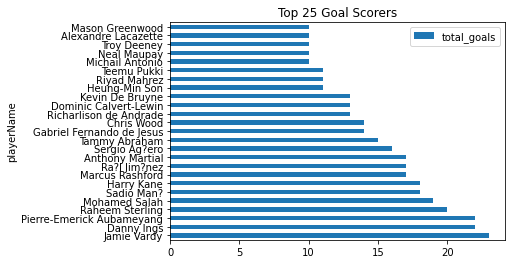

In [18]:
#Goal bar chart
top25GoalScorers.plot.barh(x='playerName', 
                          y='total_goals', 
                          title='Top 25 Goal Scorers')

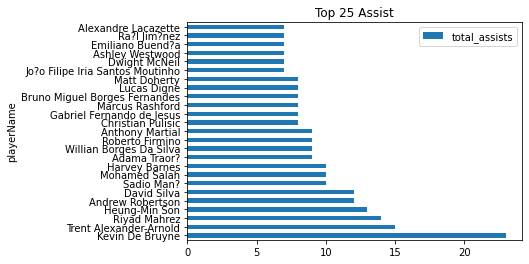

In [19]:
#Assist bar chart
top25Assist.plot.barh(x='playerName',
                    y='total_assists',
                    title='Top 25 Assist')

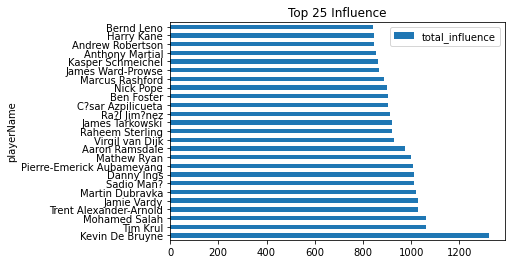

In [20]:
#Influence bar chart
top25influence.plot.barh(x='playerName',
                    y='total_influence',
                    title='Top 25 Influence')

In [21]:
#Create an empty dataframe that we can append to.
columns = ["teamName", "total_goals", "total_assists", "total_influence"]
seasonTeamData = pd.DataFrame(columns=columns)

#Create a dataframe of total goals, assists, and influence per team.
for team in teamList:
    info = {"teamName": team,
            "total_goals": 0,
            "total_assists": 0,
            "total_influence": 0}
    for row in playerData.itertuples(index=True, name='Pandas'):
        if row.team == team:
            info["total_goals"] += row.goals_scored
            info["total_assists"] += row.assists
            info["total_influence"] += row.influence
    #print(info)
    seasonTeamData = seasonTeamData.append(info, ignore_index=True)

In [22]:
seasonTeamData.head()

,teamName,total_goals,total_assists,total_influence
0,Brighton,35,30,7788.2
1,West Ham,49,44,8350.8
2,Burnley,41,37,7531.0
3,Bournemouth,38,37,7756.0
4,Man Utd,64,50,8736.8


In [23]:
#Create the same plots that were created for players, except for the teams.

#Goals
teamGoalSortDf = seasonTeamData.sort_values("total_goals", ascending=False)
teamGoals = teamGoalSortDf[["teamName", "total_goals"]].reset_index(drop=True)

#Assists
teamAssistSortDf = seasonTeamData.sort_values("total_assists", ascending=False)
teamAssists = teamAssistSortDf[["teamName", "total_assists"]].reset_index(drop=True)

#Influence
teamInfluenceSortDf = seasonTeamData.sort_values("total_influence", ascending=False)
teamInfluence = teamInfluenceSortDf[["teamName", "total_influence"]].reset_index(drop=True)

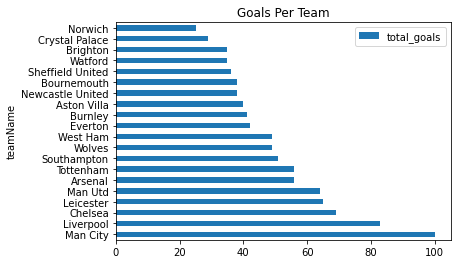

In [24]:
#Goal bar chart
teamGoals.plot.barh(x='teamName', 
                    y='total_goals', 
                    title='Goals Per Team')

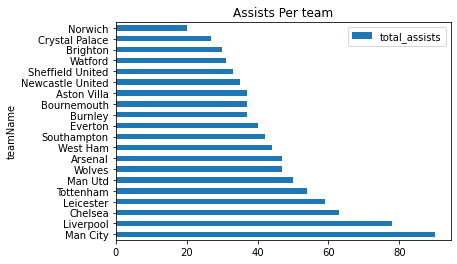

In [25]:
#Assist bar chart
teamAssists.plot.barh(x='teamName',
                    y='total_assists',
                    title='Assists Per team')

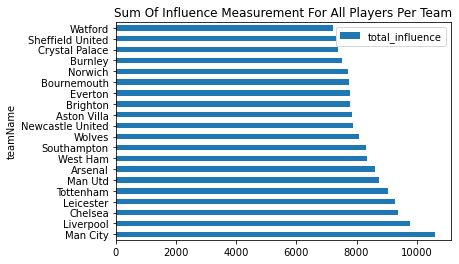

In [26]:
#Influence bar chart
teamInfluence.plot.barh(x='teamName',
                    y='total_influence',
                    title='Sum Of Influence Measurement For All Players Per Team')

In [ ]:
#########
'''
Start of feature selection assignment for week 2

'''
#########

In [28]:
# Create a df of the EPL '29 - '20 standings and add the placement of each team to the seasonPlayerData dataframe


placementData = {"team": ["Liverpool",
                          "Manchester City",
                          "Manchester United",
                          "Chelsea",
                          "Leicester City",
                          "Tottenham Hotspur",
                          "Wolverhampton",
                          "Arsenal",
                          "Sheffield United",
                          "Burnley",
                          "Southampton",
                          "Everton",
                          "Newcastle United",
                          "Crystal Palace",
                          "Brighton & Hove Albion",
                          "West Ham United",
                          "Aston Villa",
                          "AFC Bournemouth",
                          "Watford",
                          "Norwich City"], 
                 "standings": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

standings = pd.DataFrame.from_dict(placementData)
standings.head()

,team,standings
0,Liverpool,1
1,Manchester City,2
2,Manchester United,3
3,Chelsea,4
4,Leicester City,5


In [29]:
# Join the standings data with the seasonPlayerData to get the placement of each of their teams
seasonPlayerData = seasonPlayerData.merge(standings, on = "team")
seasonPlayerData.head()


,playerName,total_goals,total_assists,total_influence,team,Award_Winner,standings
0,Aaron Lennon,0,0,45.0,Burnley,No,10
1,Ashley Barnes,6,0,226.2,Burnley,No,10
2,Ashley Westwood,2,7,596.8,Burnley,No,10
3,Bailey Peacock-Farrell,0,0,0.0,Burnley,No,10
4,Ben Gibson,0,0,0.0,Burnley,No,10


In [30]:
#seasonPlayerData = seasonPlayerData["playerName", "total_goals", "total_assists", "total_influence", "team", "standings", "Award_Winner"]
award = seasonPlayerData.pop("Award_Winner")
seasonPlayerData["Award_Winner"] = award

In [31]:
# One hot encoding to convert the dataframe's categorical features into numerical values for our ML model.
# Using Pandas get_dummies instead of sklearn's OneHotEncoder

newTestPlayers = pd.get_dummies(seasonPlayerData.playerName)
newTestTeams = pd.get_dummies(seasonPlayerData.team)
newTestAward = pd.get_dummies(seasonPlayerData.Award_Winner)

seasonPlayerData = pd.concat([seasonPlayerData, newTestPlayers, newTestTeams, newTestAward], axis = 1)
seasonPlayerData.drop(["playerName", "team", "Award_Winner"], axis = 1, inplace=True)
seasonPlayerData.head()

,total_goals,total_assists,total_influence,standings,?rjan Nyland,Aaron Lennon,Abd-Al-Ali Morakinyo Olaposi Koiki,Abdoulaye Doucour?,Adam Lallana,Adam Masina,...,Chelsea,Crystal Palace,Everton,Liverpool,Newcastle United,Sheffield United,Southampton,Watford,No,Yes
0,0,0,45.0,10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,0,226.2,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,7,596.8,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
# Feature selection using SelectKBest with X^2 scoring to choose our top 4 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

sDf = SelectKBest(chi2, k=3).fit_transform(seasonPlayerData.iloc[:, :-2], seasonPlayerData.iloc[:, -1])

In [33]:
sDf[:5]

array([[0, 45.0, 0],
       [0, 226.2, 0],
       [7, 596.8, 0],
       [0, 0.0, 0],
       [0, 0.0, 0]], dtype=object)

In [35]:
# To get the scoring of this...
sel = SelectKBest(chi2, k=3)

sel.fit(seasonPlayerData.iloc[:, :-2], seasonPlayerData.iloc[:, -1])
sel.transform(seasonPlayerData.iloc[:, :-2])
sel.scores_

array([4.18755002e+00, 9.84027180e+00, 4.13540701e+02, 8.89938241e+00,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
       2.89017341e-03, 2.89017341e-03, 2.89017341e-03, 2.89017341e-03,
      